In [13]:
import model
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

network = model.network()
network.set_fitness_distr('uniform')
size = 5000
G = network.generate_network(size)

Text(0.5, 1.0, 'Fitness Distribution')

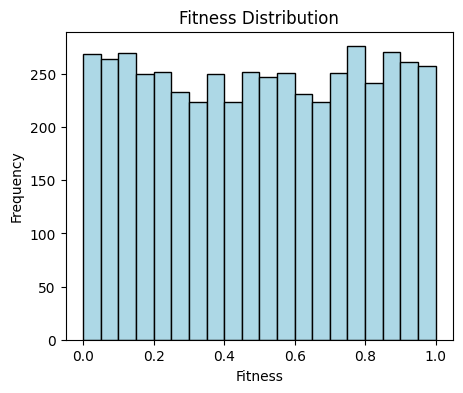

In [14]:
data = G

fitness_values = [fitness for _, (_, fitness) in data.items()]

plt.figure(figsize=(5,4))
plt.hist(fitness_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.title("Fitness Distribution")

"\nend_time_degrees = [node_degrees[node][-1] for node in range(size)]\ntop_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:10]\nlegend_labels = [f'Node {node}' for node in top_nodes]\n\nplt.legend(legend_labels)\n"

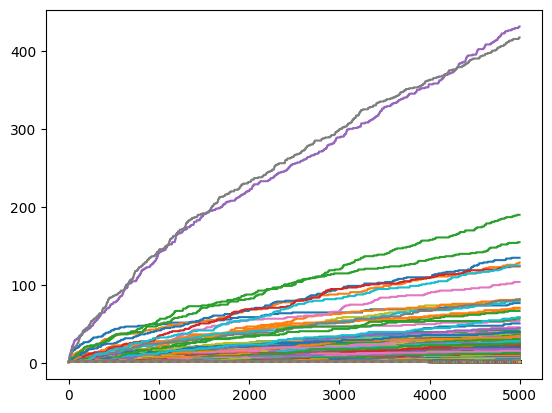

In [15]:
""" Degree plot looks ok. Still need to add fitness and ids of top degrees to the plot 
            and make averaged plot """

node_degrees = []
times = []
for i in range(size):
    k, t = network.get_degree_wrt_time(i)
    node_degrees.append(k)
    times.append(t)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

'''
end_time_degrees = [node_degrees[node][-1] for node in range(size)]
top_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:10]
legend_labels = [f'Node {node}' for node in top_nodes]

plt.legend(legend_labels)
'''


C:\Users\Leont\AppData\Local\Temp\ipykernel_17244\3088813777.py:4: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


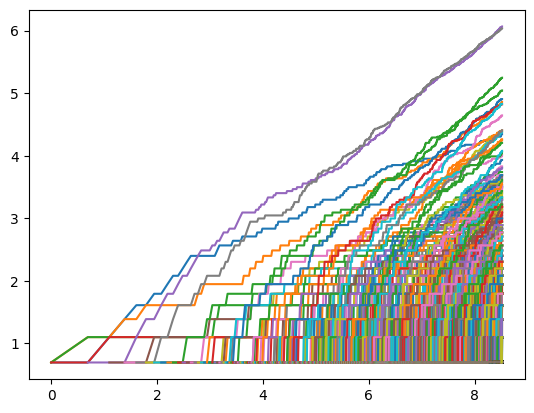

In [16]:
degrees = node_degrees

lnk = [np.log(x) for x in degrees]
lnt = [np.log(t) for t in times]

for i in range(len(lnk)):
    plt.plot(lnt[i], lnk[i])
    

C:\Users\Leont\AppData\Local\Temp\ipykernel_17244\1182654462.py:12: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
C:\Users\Leont\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


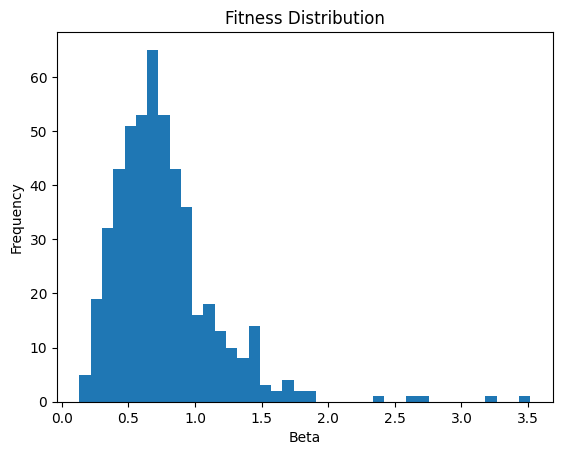

In [17]:
""" Fitness distribution according to the book. Clearly not right, but
    from some perspective it makes sense: most values are close to zero
    since new nodes are created later and, therefore, have less time to
    overtake old onces. Maybe they ommited some details in the book,
      dont know, trying to figure it out  """

# Extracting end-time degrees for top nodes
end_time_degrees = [node_degrees[node][-1] for node in range(size - 1)]
top_nodes = sorted(range(size - 1), key=lambda x: end_time_degrees[x], reverse=True)[:int(0.1 * size)]

# Filtering degrees for top nodes
top_degrees = [node_degrees[i] for i in top_nodes]
top_times = [times[i] for i in top_nodes]

degrees, times = top_degrees, top_times

lnk = [np.log(x) for x in degrees]
lnt = [np.log(t) for t in times]

# Estimating betas using linear regression
beta = []
for i in range(len(lnk)):
    if len(lnk[i]) < 10:
        continue

    slope, intercept, _, _, _ = linregress(lnt[i], lnk[i])
    
    if slope > 0:
        beta.append(slope)

# Plotting the fitness distribution histogram
plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.show()